# EDA Skeleton
<hr>

Use this to load our data into a dataframe and perform any exploration you like.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from pandas.io import sql
import pickle
import os.path
from os import path

# Database creds, don't share on public repo
hostname='95.217.156.58'
dbname='crimeStats'
uname='sandwich'
pwd='321#@!IdiotSandwich'
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))

# pulls clean data from repo and saves locally
if path.exists("crime.dat"):
    print("Found crime data. Loading as pandas df")
    fh = open("crime.dat", 'rb')
    df = pickle.load(fh)
    fh.close()
else:
    print("Crime data not downloaded, saving file in root dir as crime.dat")
    print("Downloading 1.2GB, this may take a while...")
    df = pd.read_sql('SELECT * FROM crimeTable', con=engine)
    fh = open('crime.dat', 'wb+')
    pickle.dump(df, fh)
    fh.close()

Found crime data. Loading as pandas df


In [2]:
df

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881984,24592084,2006-10-01,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",GRAND LARCENY,PL 1553001,F,<18,M,BLACK,40.676655,-73.916466,K,73,0.0,69.0,2.0,17.0,52.0
3881985,24028282,2006-08-25,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,PL 2214000,M,<18,M,WHITE,40.625264,-73.998697,K,62,0.0,10.0,2.0,7.0,41.0
3881986,24036787,2006-08-26,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,18-24,M,BLACK,40.801304,-73.936106,M,25,0.0,7.0,4.0,35.0,16.0
3881987,24028407,2006-08-25,"TRAFFIC,UNCLASSIFIED MISDEMEANOR",VEHICLE AND TRAFFIC LAWS,VTL05110E2,F,25-44,M,BLACK,40.675505,-73.899692,K,75,0.0,45.0,2.0,37.0,47.0


In [3]:
# first thing I'd like to do is get some basic stats. male vs female crime, felony vs misdemeanor, etc
# some pie charts will be perfect for this

df['age_group'].value_counts()

25-44    1793692
18-24    1020415
45-64     715855
<18       319615
65+        32412
Name: age_group, dtype: int64

In [4]:
df['perp_sex'].value_counts()

M    3230948
F     651041
Name: perp_sex, dtype: int64

In [5]:
df['law_cat_cd'].value_counts()

M    2585027
F    1036276
V     227082
I      20244
Name: law_cat_cd, dtype: int64

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
a = df['age_group'].value_counts()
b = df['perp_sex'].value_counts()
c = df['law_cat_cd'].value_counts()
a2 = ["25-44","18-24","45-64","<18","65+"]
b2 = ["M","F"]
c2 = ["M","F","V","I"]

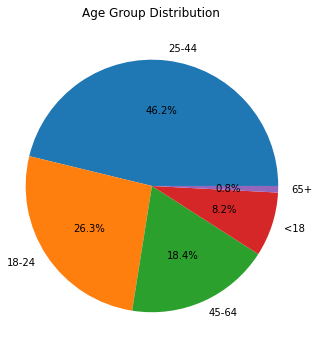

In [8]:
fig, ax = plt.subplots()
ax.pie(a, labels=a2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Age Group Distribution')

fig.set_size_inches(5, 6)
plt.show()

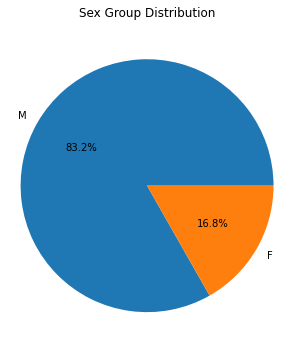

In [9]:
fig, ax = plt.subplots()
ax.pie(b, labels=b2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Sex Group Distribution')

fig.set_size_inches(5, 6)
plt.show()

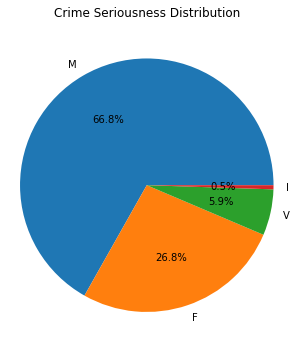

In [10]:
fig, ax = plt.subplots()
ax.pie(c, labels=c2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Crime Seriousness Distribution')

fig.set_size_inches(5, 6)
plt.show()

In [11]:
# as per profs reccomendation, we should also look at more recent data,
# so I want to see if there will be any changes between recent and total data

# we start by checking our last year.

df.sort_values('arrest_date',ascending=False)

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
155794,206889273,2019-12-31,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,PL 1552500,M,25-44,M,WHITE HISPANIC,40.808374,-73.946886,M,28,0.0,18.0,4.0,36.0,18.0
161540,206882738,2019-12-31,"TRAFFIC,UNCLASSIFIED INFRACTIO",OTHER TRAFFIC INFRACTION,VTL051101A,M,25-44,M,WHITE,40.756812,-73.873657,Q,115,97.0,65.0,3.0,21.0,73.0
159423,206890920,2019-12-31,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,PL 2200602,F,25-44,M,BLACK,40.695792,-73.939096,K,79,0.0,69.0,2.0,49.0,51.0
147594,206890429,2019-12-31,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200502,F,18-24,F,BLACK,40.723997,-73.975815,M,9,2.0,70.0,4.0,50.0,5.0
149753,206882634,2019-12-31,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,PL 265031B,F,45-64,M,BLACK,40.676020,-73.881273,K,75,2.0,45.0,2.0,37.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485923,9933120,2006-01-01,WEAPONS POSSESSION 3,DANGEROUS WEAPONS,PL 2650201,F,25-44,M,BLACK HISPANIC,40.795815,-73.937101,M,23,2.0,7.0,4.0,35.0,16.0
486794,9930002,2006-01-01,"NY STATE LAWS,UNCLASSIFIED VIOLATION",OTHER STATE LAWS,LOC000000V,V,45-64,M,BLACK,40.699922,-73.948963,K,79,2.0,36.0,2.0,38.0,56.0
495487,9930100,2006-01-01,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,PL 1601001,F,18-24,M,BLACK,40.792195,-73.938195,M,23,0.0,7.0,4.0,35.0,14.0
488169,9930236,2006-01-01,"DISORDERLY CONDUCT SUBD 1,2,3,4,5,6,7",DISORDERLY CONDUCT,PL 2402001,V,18-24,M,WHITE HISPANIC,40.760858,-73.922998,Q,114,0.0,39.0,3.0,4.0,72.0


In [12]:
# since our data ends NYE on 2019, well do the last five years from that date

df['arrest_date'] = pd.to_datetime(df['arrest_date'], format='%Y-%m-%d')
  
# Filter data between two dates
recent_df = df.loc[(df['arrest_date'] >= '2014-12-31')]
# Display
recent_df

,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
5,189182271,2018-10-24,RAPE 3,RAPE,PL 1302503,F,45-64,M,WHITE HISPANIC,40.716196,-73.997491,M,5,0.0,70.0,4.0,32.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292178,140488845,2015-01-09,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",MISCELLANEOUS PENAL LAW,PL 215510B,F,18-24,F,BLACK,40.668296,-73.911343,K,73,0.0,55.0,2.0,17.0,46.0
1292438,140582175,2015-01-17,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,PL 1651502,M,18-24,M,BLACK,40.745631,-73.998248,M,10,0.0,12.0,4.0,10.0,6.0
1292450,140529126,2015-01-13,"CONTROLLED SUBSTANCE,INTENT TO SELL 3",DANGEROUS DRUGS,PL 2201601,F,25-44,M,BLACK,40.869685,-73.869910,B,49,0.0,29.0,5.0,22.0,30.0
1292455,140544770,2015-01-14,"NY STATE LAWS,UNCLASSIFIED FELONY",OTHER STATE LAWS,ED 6512000,F,25-44,F,ASIAN / PACIFIC ISLANDER,40.719660,-74.002245,M,1,0.0,57.0,4.0,32.0,1.0


In [13]:
# now lets generate identical pie charts to see if the distribution changes at all

recent_a = recent_df['age_group'].value_counts()
recent_b = recent_df['perp_sex'].value_counts()
recent_c = recent_df['law_cat_cd'].value_counts()

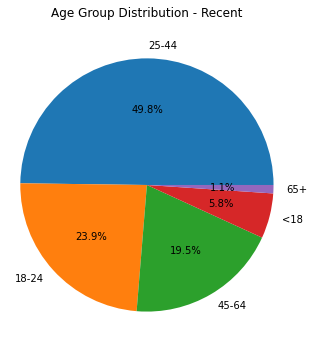

In [14]:
fig, ax = plt.subplots()
ax.pie(recent_a, labels=a2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Age Group Distribution - Recent')

fig.set_size_inches(5, 6)
plt.show()

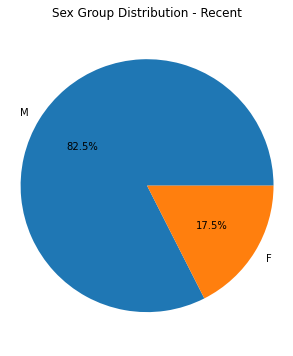

In [15]:
fig, ax = plt.subplots()
ax.pie(recent_b, labels=b2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Sex Group Distribution - Recent')

fig.set_size_inches(5, 6)
plt.show()

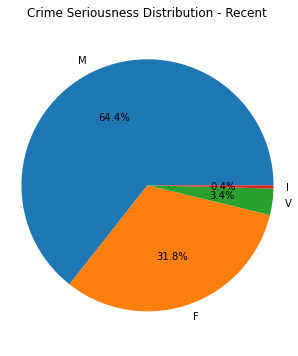

In [16]:
fig, ax = plt.subplots()
ax.pie(recent_c, labels=c2, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Crime Seriousness Distribution - Recent')

fig.set_size_inches(5, 6)
plt.show()

In [17]:
# install if you dont have it
# conda install -c conda-forge ipyleaflet

In [40]:
# there are slight differences in this broad view but nothing notible

# now lets try to explore the data in something that may provide more value, a heatmap

from ipyleaflet import Map, Heatmap

# these coords and zoom give a good view, so lets move on to attempting a heatmap
m = Map(center=(40.785091, -73.968285), zoom=11)
m

Map(center=[40.785091, -73.968285], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [41]:
relCols = ["latitude","longitude","law_cat_cd"]
mapdf = recent_df[relCols]

In [42]:
mapdf["law_cat_cd"].replace({"M": 666, "F": 1000,"V":333,"I":333}, inplace=True)
mapdf

C:\Users\Ambrose\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,latitude,longitude,law_cat_cd
0,40.800694,-73.941109,1000.0
1,40.757839,-73.991212,1000.0
2,40.648650,-73.950336,1000.0
3,40.674583,-73.930222,1000.0
5,40.716196,-73.997491,1000.0
...,...,...,...
1292178,40.668296,-73.911343,1000.0
1292438,40.745631,-73.998248,666.0
1292450,40.869685,-73.869910,1000.0
1292455,40.719660,-74.002245,1000.0


In [43]:
heatList = []
for index, row in mapdf.iterrows():
    heatList.append([row['latitude'], row['longitude'],row['law_cat_cd']])

In [56]:
grad = {0.2: 'blue', 0.4: 'cyan', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'}
heatmap = Heatmap(locations=heatList,radius=3,blur=9)
m = Map(center=(40.785091, -73.968285), zoom=11, gradient=grad)
m.add_layer(heatmap)
m

Map(center=[40.785091, -73.968285], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [64]:
# its weird that it looks a lot "hotter" in the touristy areas.
# I'm curious if my distribution of crime seriousness is at play
# so i am going to seperate felonies from misdemeanors and try again

relCols = ["latitude","longitude","law_cat_cd"]
mapdf = recent_df[relCols]
mapdf = mapdf[mapdf["law_cat_cd"]=="F"]
mapdf["law_cat_cd"].replace({"F": 1000}, inplace=True)

In [65]:
# this will be felonies only

heatList = []
for index, row in mapdf.iterrows():
    heatList.append([row['latitude'], row['longitude'],row['law_cat_cd']])

grad = {0.2: 'blue', 0.4: 'cyan', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'}
heatmap = Heatmap(locations=heatList,radius=3,blur=9)
m = Map(center=(40.785091, -73.968285), zoom=11, gradient=grad)
m.add_layer(heatmap)
m

Map(center=[40.785091, -73.968285], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [66]:
relCols = ["latitude","longitude","law_cat_cd"]
mapdf = recent_df[relCols]
mapdf = mapdf[mapdf["law_cat_cd"]=="M"]
mapdf["law_cat_cd"].replace({"M": 1000}, inplace=True)

In [67]:
# this will be misdemeanors only

heatList = []
for index, row in mapdf.iterrows():
    heatList.append([row['latitude'], row['longitude'],row['law_cat_cd']])

grad = {0.2: 'blue', 0.4: 'cyan', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'}
heatmap = Heatmap(locations=heatList,radius=3,blur=9)
m = Map(center=(40.785091, -73.968285), zoom=11, gradient=grad)
m.add_layer(heatmap)
m

Map(center=[40.785091, -73.968285], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [148]:
# the last thing I want to look into is if seasons are relevant to crime.

summer_df = recent_df[((recent_df.arrest_date >= '2015-06-01') & (recent_df.arrest_date <= '2015-08-31')) | 
                      ((recent_df.arrest_date >= '2016-06-01') & (recent_df.arrest_date <= '2016-08-31')) |
                      ((recent_df.arrest_date >= '2017-06-01') & (recent_df.arrest_date <= '2017-08-31')) |
                      ((recent_df.arrest_date >= '2018-06-01') & (recent_df.arrest_date <= '2018-08-31')) |
                      ((recent_df.arrest_date >= '2019-06-01') & (recent_df.arrest_date <= '2019-08-31')) ]

spring_df = recent_df[((recent_df.arrest_date >= '2015-03-01') & (recent_df.arrest_date <= '2015-05-31')) | 
                      ((recent_df.arrest_date >= '2016-03-01') & (recent_df.arrest_date <= '2016-05-31')) |
                      ((recent_df.arrest_date >= '2017-03-01') & (recent_df.arrest_date <= '2017-05-31')) |
                      ((recent_df.arrest_date >= '2018-03-01') & (recent_df.arrest_date <= '2018-05-31')) |
                      ((recent_df.arrest_date >= '2019-03-01') & (recent_df.arrest_date <= '2019-05-31')) ]

fall_df = recent_df[((recent_df.arrest_date >= '2015-09-01') & (recent_df.arrest_date <= '2015-11-30')) | 
                      ((recent_df.arrest_date >= '2016-09-01') & (recent_df.arrest_date <= '2016-11-30')) |
                      ((recent_df.arrest_date >= '2017-09-01') & (recent_df.arrest_date <= '2017-11-30')) |
                      ((recent_df.arrest_date >= '2018-09-01') & (recent_df.arrest_date <= '2018-11-30')) |
                      ((recent_df.arrest_date >= '2019-09-01') & (recent_df.arrest_date <= '2019-11-30')) ]

winter_df = recent_df[((recent_df.arrest_date >= '2014-12-01') & (recent_df.arrest_date <= '2015-02-28')) | 
                      ((recent_df.arrest_date >= '2015-12-01') & (recent_df.arrest_date <= '2016-02-29')) |
                      ((recent_df.arrest_date >= '2016-12-01') & (recent_df.arrest_date <= '2017-02-28')) |
                      ((recent_df.arrest_date >= '2017-12-01') & (recent_df.arrest_date <= '2018-02-28')) |
                      ((recent_df.arrest_date >= '2018-12-01') & (recent_df.arrest_date <= '2019-02-28')) ]

In [149]:
a = summer_df.count()
b = spring_df.count()
c = fall_df.count()
d = winter_df.count()

In [150]:
#print(a)
#print(b)
#print(c)
#print(d)

In [151]:
# NOTE: winter may have less due to one year being cut off since winter crosses over 
# the new year. This makes me believe that fall is probably the least crime filled season

summer_df['arrest_date'] = summer_df['arrest_date'].astype(str)
summer_df['arrest_date'] = summer_df['arrest_date'].str[5:]
spring_df['arrest_date'] = spring_df['arrest_date'].astype(str)
spring_df['arrest_date'] = spring_df['arrest_date'].str[5:]
fall_df['arrest_date'] = fall_df['arrest_date'].astype(str)
fall_df['arrest_date'] = fall_df['arrest_date'].str[5:]
winter_df['arrest_date'] = winter_df['arrest_date'].astype(str)
winter_df['arrest_date'] = winter_df['arrest_date'].str[5:]


<ipython-input-151-28ba0acc6ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df['arrest_date'] = summer_df['arrest_date'].astype(str)
<ipython-input-151-28ba0acc6ca6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df['arrest_date'] = summer_df['arrest_date'].str[5:]
<ipython-input-151-28ba0acc6ca6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [152]:
# we could fix the approximation of winter by looking at it before removing dates

cols = ['arrest_date','arrest_key']
summer_df = summer_df[cols]
spring_df = spring_df[cols]
fall_df = fall_df[cols]
winter_df = winter_df[cols]

winter_df = winter_df.groupby('arrest_date').count()
summer_df = summer_df.groupby('arrest_date').count()
fall_df = fall_df.groupby('arrest_date').count()
spring_df = spring_df.groupby('arrest_date').count()

winter_df

,arrest_key
arrest_date,
01-01,2129
01-02,2566
01-03,2719
01-04,2411
01-05,2751
...,...
12-27,2026
12-28,2092
12-29,2077


In [153]:
# getting the average before the other cell is run

winter_df = recent_df[((recent_df.arrest_date >= '2015-12-01') & (recent_df.arrest_date <= '2016-02-29')) |
                      ((recent_df.arrest_date >= '2016-12-01') & (recent_df.arrest_date <= '2017-02-28')) |
                      ((recent_df.arrest_date >= '2017-12-01') & (recent_df.arrest_date <= '2018-02-28')) |
                      ((recent_df.arrest_date >= '2018-12-01') & (recent_df.arrest_date <= '2019-02-28')) ]

winter_df['arrest_date'] = winter_df['arrest_date'].astype(str)
winter_df['arrest_date'] = winter_df['arrest_date'].str[5:]
winter_df = winter_df[cols]

winterAvg = winter_df.groupby('arrest_date').count()

<ipython-input-153-b78b09126455>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['arrest_date'] = winter_df['arrest_date'].astype(str)
<ipython-input-153-b78b09126455>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['arrest_date'] = winter_df['arrest_date'].str[5:]


In [154]:
winterAvg = winterAvg['arrest_key'].div(4).to_frame('arrest_key')

In [155]:
winterAvg.columns = ['arrest_avg']
winterAvg

,arrest_key
arrest_date,
01-01,451.75
01-02,551.75
01-03,611.75
01-04,558.25
01-05,608.50
...,...
12-27,506.50
12-28,523.00
12-29,519.25


In [156]:
# back to the originals

winter_df = recent_df[((recent_df.arrest_date >= '2014-12-01') & (recent_df.arrest_date <= '2015-02-28')) | 
                      ((recent_df.arrest_date >= '2015-12-01') & (recent_df.arrest_date <= '2016-02-29')) |
                      ((recent_df.arrest_date >= '2016-12-01') & (recent_df.arrest_date <= '2017-02-28')) |
                      ((recent_df.arrest_date >= '2017-12-01') & (recent_df.arrest_date <= '2018-02-28')) |
                      ((recent_df.arrest_date >= '2018-12-01') & (recent_df.arrest_date <= '2019-02-28')) ]

winter_df['arrest_date'] = winter_df['arrest_date'].astype(str)
winter_df['arrest_date'] = winter_df['arrest_date'].str[5:]
winter_df = winter_df[cols]

winter_df = winter_df.groupby('arrest_date').count()

<ipython-input-156-55b8b65de7ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['arrest_date'] = winter_df['arrest_date'].astype(str)
<ipython-input-156-55b8b65de7ed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['arrest_date'] = winter_df['arrest_date'].str[5:]


In [189]:
winter_adj = pd.concat([winter_df, winterAvg], axis=1)
winter_adj

,arrest_key,arrest_avg
arrest_date,,
01-01,2129,451.75
01-02,2566,551.75
01-03,2719,611.75
01-04,2411,558.25
01-05,2751,608.50
...,...,...
12-27,2026,506.50
12-28,2092,523.00
12-29,2077,519.25


In [190]:
sum_column = winter_adj["arrest_key"] + winter_adj["arrest_avg"]
winter_adj["adjusted"] = sum_column

In [191]:
mask = winter_adj.isin(winter_adj[-31:])
mask = mask['adjusted']

In [192]:
winter_adj = pd.concat([winter_adj, mask], axis=1)

In [193]:
winter_adj.columns = ['arrest_key','arrest_avg','adjusted','mask']

In [194]:
winter_adj = winter_adj.replace(to_replace =False,value =np.nan)

In [199]:
a = winter_adj['mask'].fillna(winter_adj['arrest_key'])

In [201]:
winter_adj = pd.concat([winter_adj, a], axis=1)

In [203]:
winter_adj = winter_adj.replace(to_replace =1.0,value =np.nan)

In [205]:
winter_adj.columns = ['arrest_key','arrest_avg','adjusted','mask','final']

In [207]:
b = winter_adj['final'].fillna(winter_adj['adjusted'])

In [209]:
winter_adj = pd.concat([winter_adj, b], axis=1)

In [211]:
winter_adj.columns = ['arrest_key','arrest_avg','adjusted','mask','mask2','final']

In [214]:
del winter_adj['arrest_key']
del winter_adj['arrest_avg']
del winter_adj['adjusted']
del winter_adj['mask']
del winter_adj['mask2']

In [215]:
winter_adj

,final
arrest_date,
01-01,2129.00
01-02,2566.00
01-03,2719.00
01-04,2411.00
01-05,2751.00
...,...
12-27,2532.50
12-28,2615.00
12-29,2596.25


In [220]:
# this could be turned into a function to reduce repitition but i really wanna just see the result

sumX = []
sumY = []
sprX = []
sprY = []
falX = []
falY = []
winX = []
winY = []

for index, row in summer_df.iterrows():
    sumX.append(index)
    sumY.append(row['arrest_key'])
for index, row in spring_df.iterrows():
    sprX.append(index)
    sprY.append(row['arrest_key'])
for index, row in fall_df.iterrows():
    falX.append(index)
    falY.append(row['arrest_key'])
for index, row in winter_adj.iterrows():
    winX.append(index)
    winY.append(row['final'])

In [225]:
winX = winX[-31:] + winX[:-31]
winY = winY[-31:] + winY[:-31]

In [228]:
a = len(sumX)
b = len(sprX)
c = len(falX)
d = len(winX)
print(a,b,c,d)

92 92 91 91


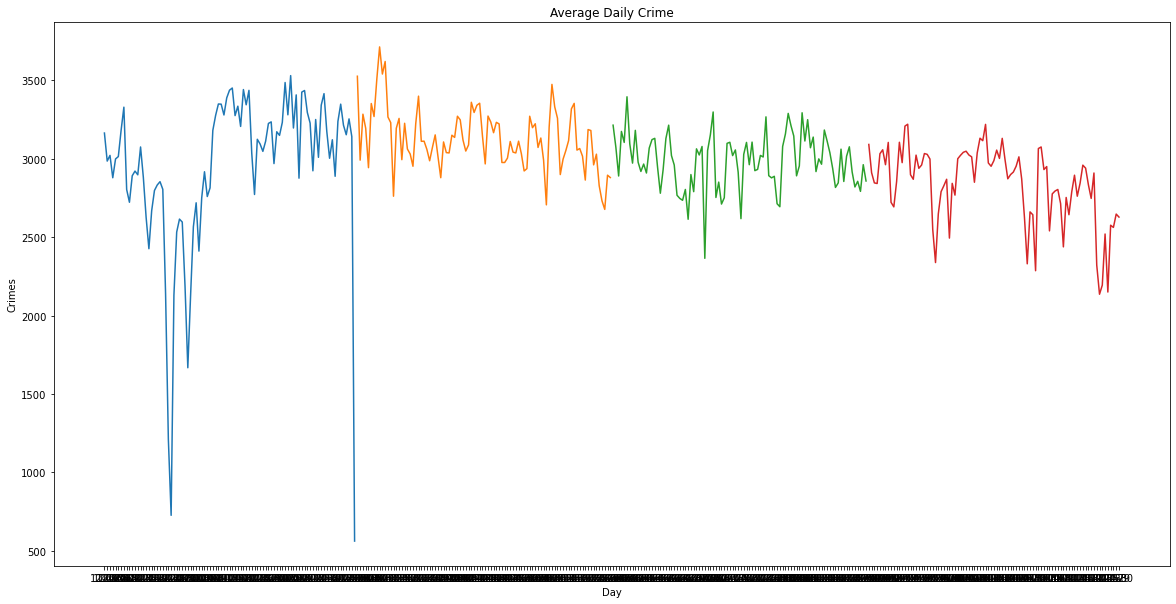

In [246]:
# they dont perfectly line up, but we might try to put them on the same graph anyway

plt.figure(figsize=(20,10))
plt.plot(winX,winY, label = "winter")
plt.plot(sprX,sprY, label = "spring")
plt.plot(sumX,sumY, label = "summer")
plt.plot(falX,falY, label = "fall")
plt.title('Average Daily Crime')
plt.xlabel('Day')
plt.ylabel('Crimes')
plt.show()

In [245]:
# I intended to overlay them, But I actually think this is very readible, so Ill keep it